In [2]:
# 3 iterasi
import os
from ultralytics import YOLO
import csv

# =========================
# KONFIGURASI UTAMA
# =========================

# Path data.yaml generalisasi
DATA_YAML = r"C:/Users/USER/Documents/a skripsi/riset/data_eval_final/test generalisasi/data.yaml"

# Output folder utama
OUTPUT_DIR = "./generalisasi_eval_iter_r/i3-e10"

ROOT_DIR = r"D:\10-ep-3-it-r"

# Daftar model (10 path)
MODEL_PATHS = [
    os.path.join(ROOT_DIR, f"1-iter/model1/weights/best.pt"),
    os.path.join(ROOT_DIR, f"2-iter/model2/weights/best.pt"),
    os.path.join(ROOT_DIR, f"3-iter/model3/weights/best.pt"),
]

CSV_OUT = os.path.join(OUTPUT_DIR, "results.csv")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ===================== HEADER CSV =====================
header = [
    "iteration",
    "TP", "FP", "TN", "FN",
    "precision", "recall", "f1_score",
    "mAP50", "mAP50_95"
]

rows = []

# ===================== LOOP VALIDASI =====================
for idx, model_path in enumerate(MODEL_PATHS, start=1):
    print(f"\nValidating model iterasi {idx}")
    model = YOLO(model_path)

    metrics = model.val(
        data=DATA_YAML,
        imgsz=640,
        conf=0.5,
        # iou=0.5,
        project=OUTPUT_DIR,
        name=f"iterasi_{idx}",
        save_json=False,
        plots=True
    )

    # Confusion Matrix
    cm = metrics.confusion_matrix.matrix
    # Format:
    # [[TP, FP],
    #  [FN, TN(background)]]

    TP = int(cm[0, 0])
    FP = int(cm[0, 1])
    FN = int(cm[1, 0])
    TN = 0  # Tidak bermakna untuk object detection
    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

    # precision = float(metrics.box.precision[0])
    # recall = float(metrics.box.recall[0])
    # f1 = 2 * precision * recall / (precision + recall + 1e-9)
    precision = float(metrics.box.p[0])
    recall = float(metrics.box.r[0])
    f1 = float(metrics.box.f1[0])


    mAP50 = float(metrics.box.map50)
    mAP5095 = float(metrics.box.map)

    rows.append([
        idx,
        TP, FP, TN, FN,
        precision, recall, f1,
        mAP50, mAP5095
    ])

# ===================== SIMPAN CSV =====================
with open(CSV_OUT, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

print("\n✅ Validation selesai")
print(f"Hasil disimpan ke: {CSV_OUT}")



Validating model iterasi 1
Ultralytics 8.3.221  Python-3.11.9 torch-2.9.0+cpu CPU (12th Gen Intel Core i5-1235U)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 379.822.8 MB/s, size: 359.7 KB)
val: Scanning C:\Users\USER\Documents\a skripsi\riset\data_eval_final\test generalisasi\test\labels.cache... 522 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 522/522 561.5Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 1.1it/s 30.4s0.9ss
                   all        522        522      0.996      0.989      0.994      0.828
Speed: 0.6ms preprocess, 40.2ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i3-e10\iterasi_1
TP: 517, FP: 1, TN: 0, FN: 5

Validating model iterasi 2
Ultralytics 8.3.221  Python-3.11.9 torch-2.9.0+c

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Tentukan path file CSV sesuai lokasi di komputer Anda
path_hasil = r'C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i3-e10\results.csv'


# Output folder utama
OUTPUT_DIR = "./generalisasi_eval_iter_r/i3-e10"

# Membaca data dari CSV
try:
    df = pd.read_csv(path_hasil)
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print(f"File tidak ditemukan di: {path_hasil}")
    # Jika menjalankan di lingkungan lokal, pastikan path sudah benar.
    # Untuk keperluan demonstrasi, kita gunakan nama file lokal jika path absolut gagal.
    df = pd.read_csv('results.csv') 

# --- Plot 1: Precision, Recall, dan F1-Score ---
plt.clf()
plt.plot(df['iteration'], df['precision'], marker='o', label='Precision', linewidth=2)
plt.plot(df['iteration'], df['recall'], marker='s', label='Recall', linewidth=2)
plt.plot(df['iteration'], df['f1_score'], marker='^', label='F1-Score', linewidth=2)

plt.title('Evaluasi Precision, Recall, dan F1-Score (5 Epoch per Iterasi)')
plt.xlabel('Iterasi')
plt.ylabel('Nilai Metrik')
plt.xticks(df['iteration'])
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
# plt.savefig('metrics_5epoch_plot.png')
plt.savefig(os.path.join(OUTPUT_DIR, 'metrics_5epoch_plot.png'))
print("Grafik 'metrics_5epoch_plot.png' telah disimpan.")

# --- Plot 2: mAP50 dan mAP50-95 ---
plt.clf()
plt.plot(df['iteration'], df['mAP50'], marker='o', label='mAP50', color='red', linewidth=2)
plt.plot(df['iteration'], df['mAP50_95'], marker='s', label='mAP50-95', color='blue', linewidth=2)

plt.title('Evaluasi mAP50 dan mAP50-95 (5 Epoch per Iterasi)')
plt.xlabel('Iterasi')
plt.ylabel('Nilai mAP')
plt.xticks(df['iteration'])
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.savefig(os.path.join(OUTPUT_DIR, 'map_5epoch_plot.png'))
print("Grafik 'map_5epoch_plot.png' telah disimpan.")

Data berhasil dimuat.
Grafik 'metrics_5epoch_plot.png' telah disimpan.
Grafik 'map_5epoch_plot.png' telah disimpan.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Tentukan path file CSV
path_hasil = r'C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i3-e10\results.csv'
FONT_SIZE = 20
OUTPUT_DIR = "./generalisasi_eval_iter_r/i3-e10"
try:
    df = pd.read_csv(path_hasil)
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("File tidak ditemukan, pastikan path sudah benar.")
    # Fallback jika dijalankan di environment lain
    df = pd.read_csv('results.csv') 

# --- Pengaturan Font ---
# Mengatur font global (seperti Times New Roman jika tersedia, atau sans-serif)
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': FONT_SIZE})
font_title = {'fontsize': FONT_SIZE, 'fontweight': 'bold'}
font_label = {'fontsize': FONT_SIZE}

# --- Membuat Subplot (1 Baris, 2 Kolom) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot Kiri: Precision, Recall, dan F1-Score
ax1.plot(df['iteration'], df['precision'], marker='o', label='Precision', linewidth=2)
ax1.plot(df['iteration'], df['recall'], marker='s', label='Recall', linewidth=2)
ax1.plot(df['iteration'], df['f1_score'], marker='^', label='F1-Score', linewidth=2)
ax1.set_title('Precision, Recall, dan F1-Score', fontdict=font_title, fontsize=FONT_SIZE)
ax1.set_xlabel('Iterasi', fontdict=font_label, fontsize=FONT_SIZE)
ax1.set_ylabel('Nilai Metrik', fontdict=font_label, fontsize=FONT_SIZE)
ax1.set_xticks(df['iteration'])
ax1.set_ylim(0, 1.05)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='lower right', fontsize=FONT_SIZE)

# Subplot Kanan: mAP50 dan mAP50-95
ax2.plot(df['iteration'], df['mAP50'], marker='o', label='mAP50', color='red', linewidth=2)
ax2.plot(df['iteration'], df['mAP50_95'], marker='s', label='mAP50-95', color='blue', linewidth=2)
ax2.set_title('mAP50 dan mAP50-95', fontdict=font_title, fontsize=FONT_SIZE)
ax2.set_xlabel('Iterasi', fontdict=font_label, fontsize=FONT_SIZE)
ax2.set_ylabel('Nilai mAP', fontdict=font_label, fontsize=FONT_SIZE)
ax2.set_xticks(df['iteration'])
ax2.set_ylim(0, 1.05)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='lower right', fontsize=FONT_SIZE)

# Menyesuaikan jarak antar subplot agar tidak tumpang tindih
plt.tight_layout()

# Simpan gambar
plt.savefig(os.path.join(OUTPUT_DIR, 'combined_evaluation_plot.png'), dpi=300)
print("Grafik gabungan 'combined_evaluation_plot.png' telah disimpan.")

Data berhasil dimuat.
Grafik gabungan 'combined_evaluation_plot.png' telah disimpan.


In [6]:
# 5 iterasi
import os
from ultralytics import YOLO
import csv

# =========================
# KONFIGURASI UTAMA
# =========================

# Path data.yaml generalisasi
DATA_YAML = r"C:/Users/USER/Documents/a skripsi/riset/data_eval_final/test generalisasi/data.yaml"

# Output folder utama
OUTPUT_DIR = "./generalisasi_eval_iter_r/i5-e10"

ROOT_DIR = r"D:\10-ep-5-it-r"

# Daftar model (10 path)
MODEL_PATHS = [
    os.path.join(ROOT_DIR, f"1-iter/model1/weights/best.pt"),
    os.path.join(ROOT_DIR, f"2-iter/model2/weights/best.pt"),
    os.path.join(ROOT_DIR, f"3-iter/model3/weights/best.pt"),
    os.path.join(ROOT_DIR, f"4-iter/model4/weights/best.pt"),
    os.path.join(ROOT_DIR, f"5-iter/model5/weights/best.pt"),
]

CSV_OUT = os.path.join(OUTPUT_DIR, "results.csv")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ===================== HEADER CSV =====================
header = [
    "iteration",
    "TP", "FP", "TN", "FN",
    "precision", "recall", "f1_score",
    "mAP50", "mAP50_95"
]

rows = []

# ===================== LOOP VALIDASI =====================
for idx, model_path in enumerate(MODEL_PATHS, start=1):
    print(f"\nValidating model iterasi {idx}")
    model = YOLO(model_path)

    metrics = model.val(
        data=DATA_YAML,
        imgsz=640,
        conf=0.5,
        # iou=0.5,
        project=OUTPUT_DIR,
        name=f"iterasi_{idx}",
        save_json=False,
        plots=True
    )

    # Confusion Matrix
    cm = metrics.confusion_matrix.matrix
    # Format:
    # [[TP, FP],
    #  [FN, TN(background)]]

    TP = int(cm[0, 0])
    FP = int(cm[0, 1])
    FN = int(cm[1, 0])
    TN = 0  # Tidak bermakna untuk object detection
    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

    # precision = float(metrics.box.precision[0])
    # recall = float(metrics.box.recall[0])
    # f1 = 2 * precision * recall / (precision + recall + 1e-9)
    precision = float(metrics.box.p[0])
    recall = float(metrics.box.r[0])
    f1 = float(metrics.box.f1[0])


    mAP50 = float(metrics.box.map50)
    mAP5095 = float(metrics.box.map)

    rows.append([
        idx,
        TP, FP, TN, FN,
        precision, recall, f1,
        mAP50, mAP5095
    ])

# ===================== SIMPAN CSV =====================
with open(CSV_OUT, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

print("\n✅ Validation selesai")
print(f"Hasil disimpan ke: {CSV_OUT}")



Validating model iterasi 1
Ultralytics 8.3.221  Python-3.11.9 torch-2.9.0+cpu CPU (12th Gen Intel Core i5-1235U)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 2227.7406.7 MB/s, size: 370.9 KB)
val: Scanning C:\Users\USER\Documents\a skripsi\riset\data_eval_final\test generalisasi\test\labels.cache... 522 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 522/522 522.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 0.9it/s 35.7s1.0ss
                   all        522        522          1      0.994      0.995      0.823
Speed: 0.9ms preprocess, 48.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i5-e10\iterasi_1
TP: 519, FP: 0, TN: 0, FN: 3

Validating model iterasi 2
Ultralytics 8.3.221  Python-3.11.9 torch-2.9.0

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Tentukan path file CSV sesuai lokasi di komputer Anda
path_hasil = r'C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i5-e10\results.csv'


# Output folder utama
OUTPUT_DIR = "./generalisasi_eval_iter_r/i5-e10"
# Membaca data dari CSV
try:
    df = pd.read_csv(path_hasil)
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print(f"File tidak ditemukan di: {path_hasil}")
    # Jika menjalankan di lingkungan lokal, pastikan path sudah benar.
    # Untuk keperluan demonstrasi, kita gunakan nama file lokal jika path absolut gagal.
    df = pd.read_csv('results.csv') 

# --- Plot 1: Precision, Recall, dan F1-Score ---
plt.clf()
plt.plot(df['iteration'], df['precision'], marker='o', label='Precision', linewidth=2)
plt.plot(df['iteration'], df['recall'], marker='s', label='Recall', linewidth=2)
plt.plot(df['iteration'], df['f1_score'], marker='^', label='F1-Score', linewidth=2)

plt.title('Evaluasi Precision, Recall, dan F1-Score (5 Epoch per Iterasi)')
plt.xlabel('Iterasi')
plt.ylabel('Nilai Metrik')
plt.xticks(df['iteration'])
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
# plt.savefig('metrics_5epoch_plot.png')
plt.savefig(os.path.join(OUTPUT_DIR, 'metrics_5epoch_plot.png'))
print("Grafik 'metrics_5epoch_plot.png' telah disimpan.")

# --- Plot 2: mAP50 dan mAP50-95 ---
plt.clf()
plt.plot(df['iteration'], df['mAP50'], marker='o', label='mAP50', color='red', linewidth=2)
plt.plot(df['iteration'], df['mAP50_95'], marker='s', label='mAP50-95', color='blue', linewidth=2)

plt.title('Evaluasi mAP50 dan mAP50-95 (5 Epoch per Iterasi)')
plt.xlabel('Iterasi')
plt.ylabel('Nilai mAP')
plt.xticks(df['iteration'])
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.savefig(os.path.join(OUTPUT_DIR, 'map_5epoch_plot.png'))
print("Grafik 'map_5epoch_plot.png' telah disimpan.")

Data berhasil dimuat.
Grafik 'metrics_5epoch_plot.png' telah disimpan.
Grafik 'map_5epoch_plot.png' telah disimpan.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Tentukan path file CSV
path_hasil = r'C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i5-e10\results.csv'
FONT_SIZE = 20
OUTPUT_DIR = "./generalisasi_eval_iter_r/i5-e10"
try:
    df = pd.read_csv(path_hasil)
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("File tidak ditemukan, pastikan path sudah benar.")
    # Fallback jika dijalankan di environment lain
    df = pd.read_csv('results.csv') 

# --- Pengaturan Font ---
# Mengatur font global (seperti Times New Roman jika tersedia, atau sans-serif)
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': FONT_SIZE})
font_title = {'fontsize': FONT_SIZE, 'fontweight': 'bold'}
font_label = {'fontsize': FONT_SIZE}

# --- Membuat Subplot (1 Baris, 2 Kolom) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot Kiri: Precision, Recall, dan F1-Score
ax1.plot(df['iteration'], df['precision'], marker='o', label='Precision', linewidth=2)
ax1.plot(df['iteration'], df['recall'], marker='s', label='Recall', linewidth=2)
ax1.plot(df['iteration'], df['f1_score'], marker='^', label='F1-Score', linewidth=2)
ax1.set_title('Precision, Recall, dan F1-Score', fontdict=font_title, fontsize=FONT_SIZE)
ax1.set_xlabel('Iterasi', fontdict=font_label, fontsize=FONT_SIZE)
ax1.set_ylabel('Nilai Metrik', fontdict=font_label, fontsize=FONT_SIZE)
ax1.set_xticks(df['iteration'])
ax1.set_ylim(0, 1.05)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='lower right', fontsize=FONT_SIZE)

# Subplot Kanan: mAP50 dan mAP50-95
ax2.plot(df['iteration'], df['mAP50'], marker='o', label='mAP50', color='red', linewidth=2)
ax2.plot(df['iteration'], df['mAP50_95'], marker='s', label='mAP50-95', color='blue', linewidth=2)
ax2.set_title('mAP50 dan mAP50-95', fontdict=font_title, fontsize=FONT_SIZE)
ax2.set_xlabel('Iterasi', fontdict=font_label, fontsize=FONT_SIZE)
ax2.set_ylabel('Nilai mAP', fontdict=font_label, fontsize=FONT_SIZE)
ax2.set_xticks(df['iteration'])
ax2.set_ylim(0, 1.05)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='lower right', fontsize=FONT_SIZE)

# Menyesuaikan jarak antar subplot agar tidak tumpang tindih
plt.tight_layout()

# Simpan gambar
plt.savefig(os.path.join(OUTPUT_DIR, 'combined_evaluation_plot.png'), dpi=300)
print("Grafik gabungan 'combined_evaluation_plot.png' telah disimpan.")

Data berhasil dimuat.
Grafik gabungan 'combined_evaluation_plot.png' telah disimpan.


In [9]:
# 5 iterasi
import os
from ultralytics import YOLO
import csv

# =========================
# KONFIGURASI UTAMA
# =========================

# Path data.yaml generalisasi
DATA_YAML = r"C:/Users/USER/Documents/a skripsi/riset/data_eval_final/test generalisasi/data.yaml"

# Output folder utama
OUTPUT_DIR = "./generalisasi_eval_iter_r/i10-e10"

ROOT_DIR = r"C:\Users\USER\Documents\a skripsi\workv1\self-training"

# Daftar model (10 path)
MODEL_PATHS = [
    os.path.join(ROOT_DIR, f"1-iter/model1/weights/best.pt"),
    os.path.join(ROOT_DIR, f"2-iter/model2/weights/best.pt"),
    os.path.join(ROOT_DIR, f"3-iter/model3/weights/best.pt"),
    os.path.join(ROOT_DIR, f"4-iter/model4/weights/best.pt"),
    os.path.join(ROOT_DIR, f"5-iter/model5/weights/best.pt"),
    os.path.join(ROOT_DIR, f"6-iter/model6/weights/best.pt"),
    os.path.join(ROOT_DIR, f"7-iter/model7/weights/best.pt"),
    os.path.join(ROOT_DIR, f"8-iter/model8/weights/best.pt"),
    os.path.join(ROOT_DIR, f"9-iter/model9/weights/best.pt"),
    os.path.join(ROOT_DIR, f"10-iter/model10/weights/best.pt"),
]

CSV_OUT = os.path.join(OUTPUT_DIR, "results.csv")

os.makedirs(OUTPUT_DIR, exist_ok=True)

# ===================== HEADER CSV =====================
header = [
    "iteration",
    "TP", "FP", "TN", "FN",
    "precision", "recall", "f1_score",
    "mAP50", "mAP50_95"
]

rows = []

# ===================== LOOP VALIDASI =====================
for idx, model_path in enumerate(MODEL_PATHS, start=1):
    print(f"\nValidating model iterasi {idx}")
    model = YOLO(model_path)

    metrics = model.val(
        data=DATA_YAML,
        imgsz=640,
        conf=0.5,
        # iou=0.5,
        project=OUTPUT_DIR,
        name=f"iterasi_{idx}",
        save_json=False,
        plots=True
    )

    # Confusion Matrix
    cm = metrics.confusion_matrix.matrix
    # Format:
    # [[TP, FP],
    #  [FN, TN(background)]]

    TP = int(cm[0, 0])
    FP = int(cm[0, 1])
    FN = int(cm[1, 0])
    TN = 0  # Tidak bermakna untuk object detection
    print(f"TP: {TP}, FP: {FP}, TN: {TN}, FN: {FN}")

    # precision = float(metrics.box.precision[0])
    # recall = float(metrics.box.recall[0])
    # f1 = 2 * precision * recall / (precision + recall + 1e-9)
    precision = float(metrics.box.p[0])
    recall = float(metrics.box.r[0])
    f1 = float(metrics.box.f1[0])


    mAP50 = float(metrics.box.map50)
    mAP5095 = float(metrics.box.map)

    rows.append([
        idx,
        TP, FP, TN, FN,
        precision, recall, f1,
        mAP50, mAP5095
    ])

# ===================== SIMPAN CSV =====================
with open(CSV_OUT, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows)

print("\n✅ Validation selesai")
print(f"Hasil disimpan ke: {CSV_OUT}")



Validating model iterasi 1
Ultralytics 8.3.221  Python-3.11.9 torch-2.9.0+cpu CPU (12th Gen Intel Core i5-1235U)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 1930.2290.0 MB/s, size: 380.3 KB)
val: Scanning C:\Users\USER\Documents\a skripsi\riset\data_eval_final\test generalisasi\test\labels.cache... 522 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 522/522  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 1.1it/s 31.4s1.0ss
                   all        522        522          1      0.983      0.991      0.812
Speed: 0.6ms preprocess, 43.3ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i10-e10\iterasi_1
TP: 513, FP: 0, TN: 0, FN: 9

Validating model iterasi 2
Ultralytics 8.3.221  Python-3.11.9 torch-2.9.0+cpu CPU 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Tentukan path file CSV sesuai lokasi di komputer Anda
path_hasil = r'C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i10-e10\results.csv'


# Output folder utama
OUTPUT_DIR = "./generalisasi_eval_iter_r/i10-e10"
# Membaca data dari CSV
try:
    df = pd.read_csv(path_hasil)
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print(f"File tidak ditemukan di: {path_hasil}")
    # Jika menjalankan di lingkungan lokal, pastikan path sudah benar.
    # Untuk keperluan demonstrasi, kita gunakan nama file lokal jika path absolut gagal.
    df = pd.read_csv('results.csv') 

# --- Plot 1: Precision, Recall, dan F1-Score ---
plt.clf()
plt.plot(df['iteration'], df['precision'], marker='o', label='Precision', linewidth=2)
plt.plot(df['iteration'], df['recall'], marker='s', label='Recall', linewidth=2)
plt.plot(df['iteration'], df['f1_score'], marker='^', label='F1-Score', linewidth=2)

plt.title('Evaluasi Precision, Recall, dan F1-Score (5 Epoch per Iterasi)')
plt.xlabel('Iterasi')
plt.ylabel('Nilai Metrik')
plt.xticks(df['iteration'])
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
# plt.savefig('metrics_5epoch_plot.png')
plt.savefig(os.path.join(OUTPUT_DIR, 'metrics_5epoch_plot.png'))
print("Grafik 'metrics_5epoch_plot.png' telah disimpan.")

# --- Plot 2: mAP50 dan mAP50-95 ---
plt.clf()
plt.plot(df['iteration'], df['mAP50'], marker='o', label='mAP50', color='red', linewidth=2)
plt.plot(df['iteration'], df['mAP50_95'], marker='s', label='mAP50-95', color='blue', linewidth=2)

plt.title('Evaluasi mAP50 dan mAP50-95 (5 Epoch per Iterasi)')
plt.xlabel('Iterasi')
plt.ylabel('Nilai mAP')
plt.xticks(df['iteration'])
plt.ylim(0, 1.05)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.savefig(os.path.join(OUTPUT_DIR, 'map_5epoch_plot.png'))
print("Grafik 'map_5epoch_plot.png' telah disimpan.")

Data berhasil dimuat.
Grafik 'metrics_5epoch_plot.png' telah disimpan.
Grafik 'map_5epoch_plot.png' telah disimpan.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Tentukan path file CSV
path_hasil = r'C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i10-e10\results.csv'
FONT_SIZE = 20
OUTPUT_DIR = "./generalisasi_eval_iter_r/i10-e10"
try:
    df = pd.read_csv(path_hasil)
    print("Data berhasil dimuat.")
except FileNotFoundError:
    print("File tidak ditemukan, pastikan path sudah benar.")
    # Fallback jika dijalankan di environment lain
    df = pd.read_csv('results.csv') 

# --- Pengaturan Font ---
# Mengatur font global (seperti Times New Roman jika tersedia, atau sans-serif)
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': FONT_SIZE})
font_title = {'fontsize': FONT_SIZE, 'fontweight': 'bold'}
font_label = {'fontsize': FONT_SIZE}

# --- Membuat Subplot (1 Baris, 2 Kolom) ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Subplot Kiri: Precision, Recall, dan F1-Score
ax1.plot(df['iteration'], df['precision'], marker='o', label='Precision', linewidth=2)
ax1.plot(df['iteration'], df['recall'], marker='s', label='Recall', linewidth=2)
ax1.plot(df['iteration'], df['f1_score'], marker='^', label='F1-Score', linewidth=2)
ax1.set_title('Precision, Recall, dan F1-Score', fontdict=font_title, fontsize=FONT_SIZE)
ax1.set_xlabel('Iterasi', fontdict=font_label, fontsize=FONT_SIZE)
ax1.set_ylabel('Nilai Metrik', fontdict=font_label, fontsize=FONT_SIZE)
ax1.set_xticks(df['iteration'])
ax1.set_ylim(0, 1.05)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(loc='lower right', fontsize=FONT_SIZE)

# Subplot Kanan: mAP50 dan mAP50-95
ax2.plot(df['iteration'], df['mAP50'], marker='o', label='mAP50', color='red', linewidth=2)
ax2.plot(df['iteration'], df['mAP50_95'], marker='s', label='mAP50-95', color='blue', linewidth=2)
ax2.set_title('mAP50 dan mAP50-95', fontdict=font_title, fontsize=FONT_SIZE)
ax2.set_xlabel('Iterasi', fontdict=font_label, fontsize=FONT_SIZE)
ax2.set_ylabel('Nilai mAP', fontdict=font_label, fontsize=FONT_SIZE)
ax2.set_xticks(df['iteration'])
ax2.set_ylim(0, 1.05)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.legend(loc='lower right', fontsize=FONT_SIZE)

# Menyesuaikan jarak antar subplot agar tidak tumpang tindih
plt.tight_layout()

# Simpan gambar
plt.savefig(os.path.join(OUTPUT_DIR, 'combined_evaluation_plot.png'), dpi=300)
print("Grafik gabungan 'combined_evaluation_plot.png' telah disimpan.")

Data berhasil dimuat.
Grafik gabungan 'combined_evaluation_plot.png' telah disimpan.


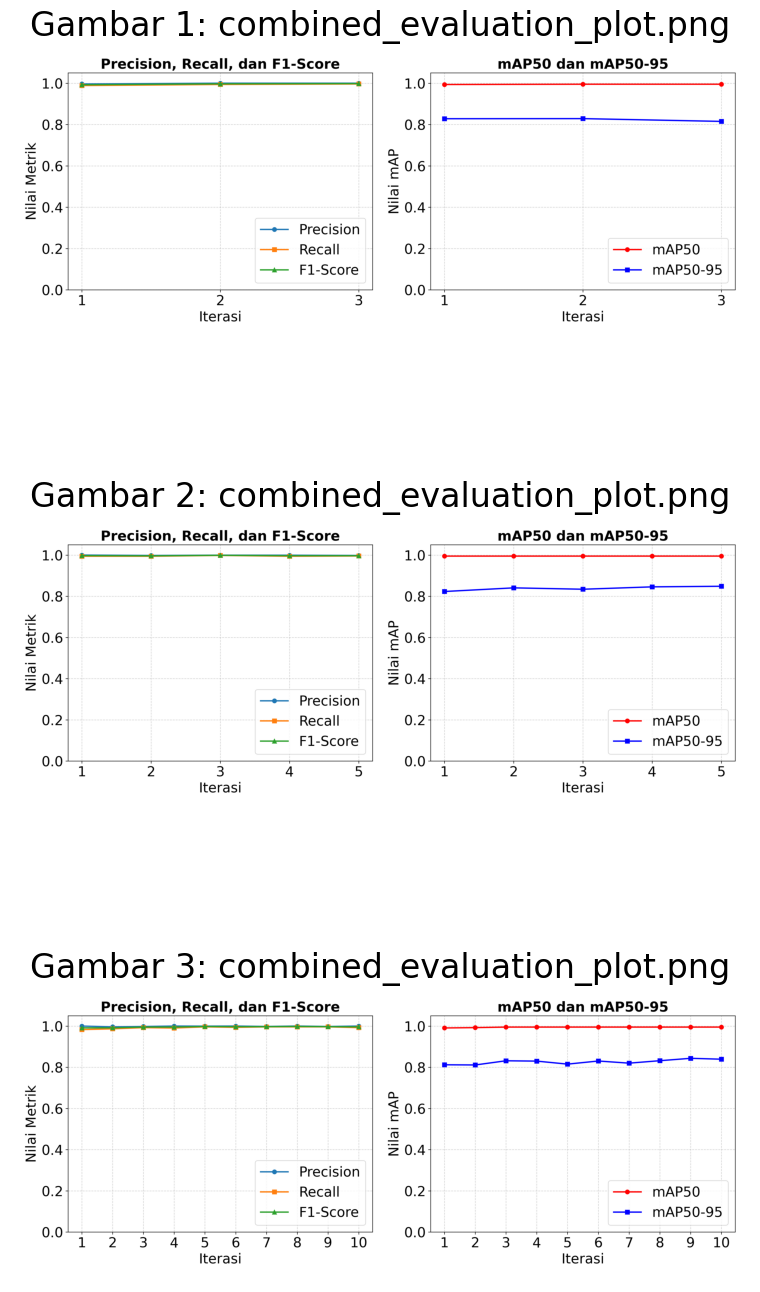

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
# ... sisa kode lainnya
import matplotlib.pyplot as plt
from PIL import Image
import os

def tampilkan_gambar_vertikal():
    # 1. Daftar path gambar (Ganti dengan path gambar asli Anda)
    image_paths = [
        r"C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i3-e10\combined_evaluation_plot.png",
        r"C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i5-e10\combined_evaluation_plot.png",
        r"C:\Users\USER\Documents\a skripsi\workv1\app\notebook_penelitian\generalisasi_eval_iter_r\i10-e10\combined_evaluation_plot.png"
    ]

    # 2. Inisialisasi plot (3 baris, 1 kolom)
    # figsize(lebar, tinggi) disesuaikan agar gambar tidak terlalu kecil
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 15))

    for i, path in enumerate(image_paths):
        if os.path.exists(path):
            # Buka gambar
            img = Image.open(path)
            
            # Tampilkan pada subplot ke-i
            axes[i].imshow(img)
            axes[i].set_title(f"Gambar {i+1}: {os.path.basename(path)}")
            axes[i].axis('off')  # Menghilangkan angka koordinat/axis
        else:
            axes[i].text(0.5, 0.5, f"File tidak ditemukan:\n{path}", 
                         ha='center', va='center')
            axes[i].axis('off')

    # Mengatur jarak antar gambar agar tidak bertumpuk
    plt.tight_layout()
    
    # Tampilkan jendela gambar
    plt.show()

if __name__ == "__main__":
    tampilkan_gambar_vertikal()